In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# not train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('G:\\Cotton\\train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
len(folders)

4

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('G:\\Cotton\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('G:\\Cotton\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 222s 4s/step - loss: 2.1229 - accuracy: 0.7422 - val_loss: 0.2329 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 363s 6s/step - loss: 0.6674 - accuracy: 0.8821 - val_loss: 0.8229 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 366s 6s/step - loss: 0.6127 - accuracy: 0.9083 - val_loss: 0.3714 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 394s 6s/step - loss: 0.5821 - accuracy: 0.9118 - val_loss: 0.5209 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 381s 6s/step - loss: 0.6913 - accuracy: 0.9077 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 379s 6s/step - loss: 0.4638 - accuracy: 0.9400 - val_loss: 4.8678e-05 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 381s 6s/step - loss: 0

In [21]:
import matplotlib.pyplot as plt

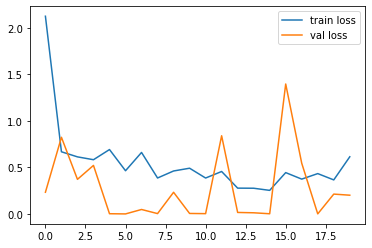

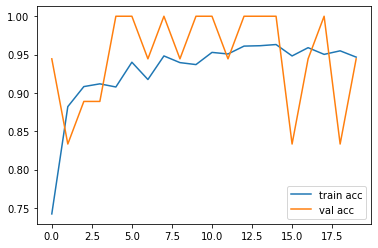

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.2066745e-34],
       [1.5288647e-24, 1.0000000e+00, 1.1472278e-22, 5.6392694e-13],
       [3.1738880e-14, 9.0740403e-15, 1.0000000e+00, 1.1894942e-12],
       [2.1609391e-36, 1.0000000e+00, 5.5266790e-30, 3.8609353e-24],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [7.2547514e-06, 1.0787818e-01, 3.9954307e-10, 8.9211458e-01],
       [1.5565939e-32, 9.6993971e-01, 0.0000000e+00, 3.0060327e-02],
       [7.3046613e-05, 6.5356094e-22, 9.9992692e-01, 6.2379965e-19],
       [1.0000000e+00, 1.3239678e-09, 5.6182033e-25, 2.1033077e-15],
       [1.6674255e-21, 5.1487203e-15, 2.1301226e-23, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.0678932e-31, 4.1535734e-38],
       [1.2875743e-26, 0.0000000e+00, 1.0000000e+00, 5.0790573e-38],
       [1.0000000e+00, 1.7750226e-25, 4.7280836e-23, 4.6914802e-33],
       [1.0000000e+00, 0.0000000e+00, 2.5873284e-31, 5.2078329e-26],
       [1.3225183e-14, 7.1518506e-